In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)

# A more logical way of grouping the times

# Coverage by regular opening hours and outside opening hours

In [4]:
%%time
stats_prime, stats_early = dict(), dict()
for i in range(24):
    if i == 23 or i < 9: continue
    time = '0' + str(i) + ':00-0' + str(i) + ':59' if i < 10 else str(i) + ':00-' + str(i) + ':59'
    if i < 12:
        stats_early[time] = showings.loc[showings.hour == i, 'coverage']
    else:
        stats_prime[time] = showings.loc[showings.hour == i, 'coverage']

Wall time: 60.8 ms


In [5]:
showings.coverage.describe()

count    1.134202e+06
mean     2.081464e-01
std      2.267668e-01
min      0.000000e+00
25%      5.345912e-02
50%      1.250000e-01
75%      2.727273e-01
max      1.000000e+00
Name: coverage, dtype: float64

In [6]:
i = []
for _, j in stats_prime.items():
    i.append(j.mean())
np.mean(i)

0.2129877836154831

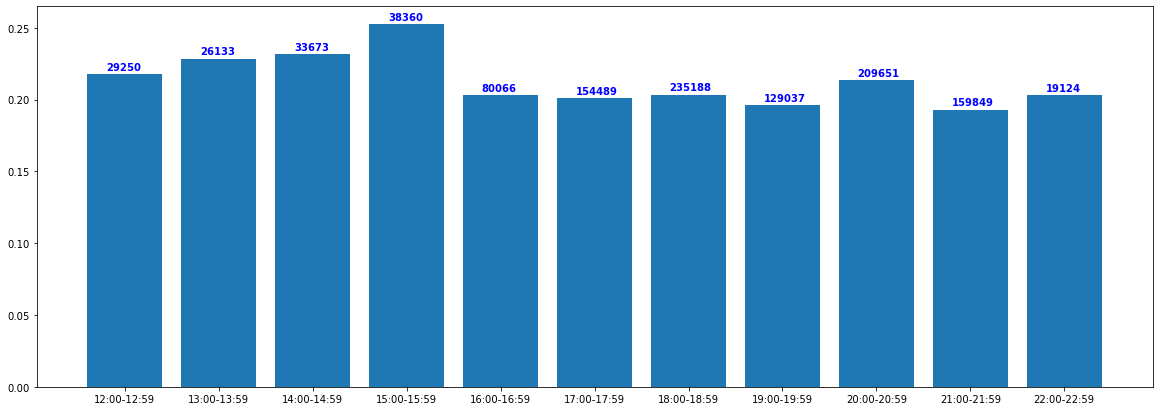

In [7]:
bar_plot(stats_prime, w=20, h=7, d=0.2, r=0, file_name='prime_hours')

In [8]:
%%time
stats_prime, stats_early = dict(), dict()
for i in range(7):
    temp = showings.loc[showings.dayofweek == i, ('hour', 'coverage')]
    stats_prime[calendar.day_name[i]] = dict()
    stats_early[calendar.day_name[i]] = dict()
    for j in range(24):
        if j == 23 or j < 9: continue
        elif j < 10:
            stats_early[calendar.day_name[i]]['0' + str(j) + ':00-0' + str(j) + ':59'] = temp.loc[temp.hour == j, 'coverage']
        elif j < 12:
            stats_early[calendar.day_name[i]][str(j) + ':00-' + str(j) + ':59'] = temp.loc[temp.hour == j, 'coverage']
        else:
            stats_prime[calendar.day_name[i]][str(j) + ':00-' + str(j) + ':59'] = temp.loc[temp.hour == j, 'coverage']

Wall time: 200 ms


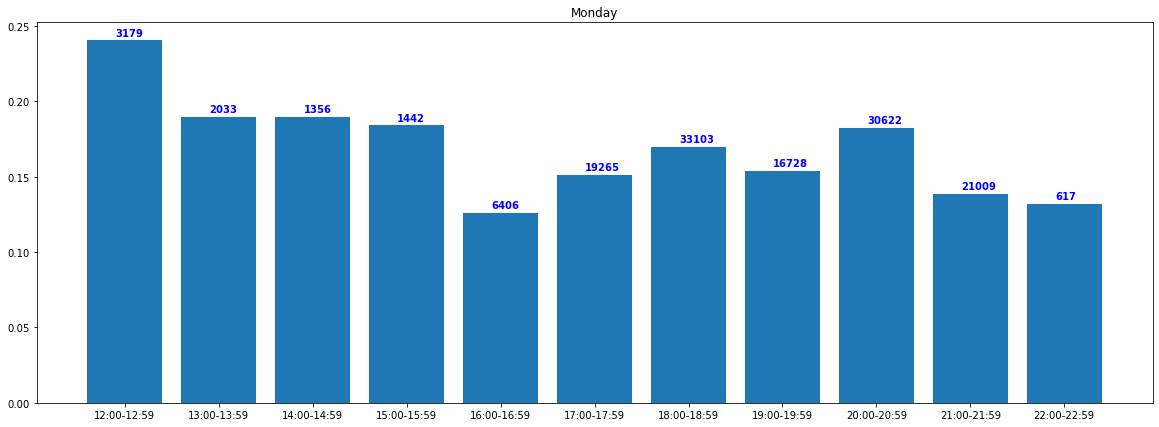

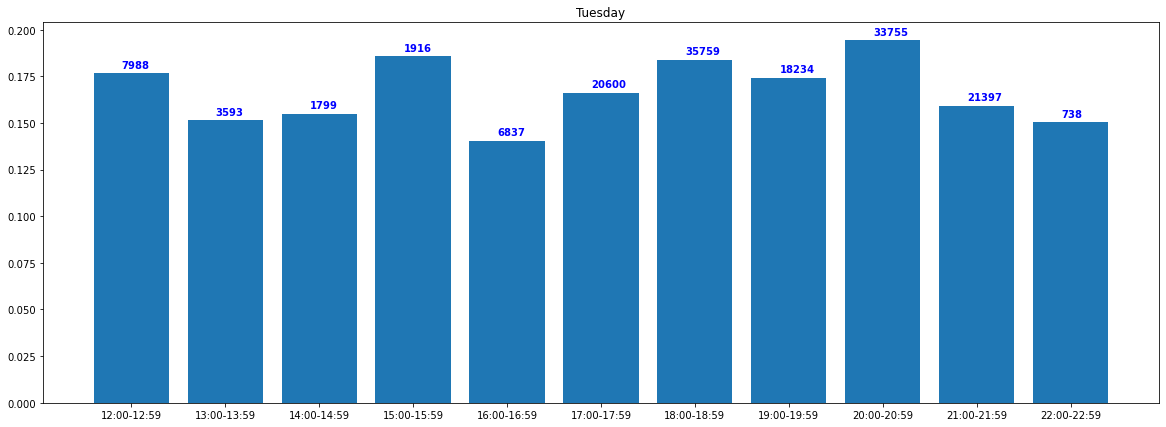

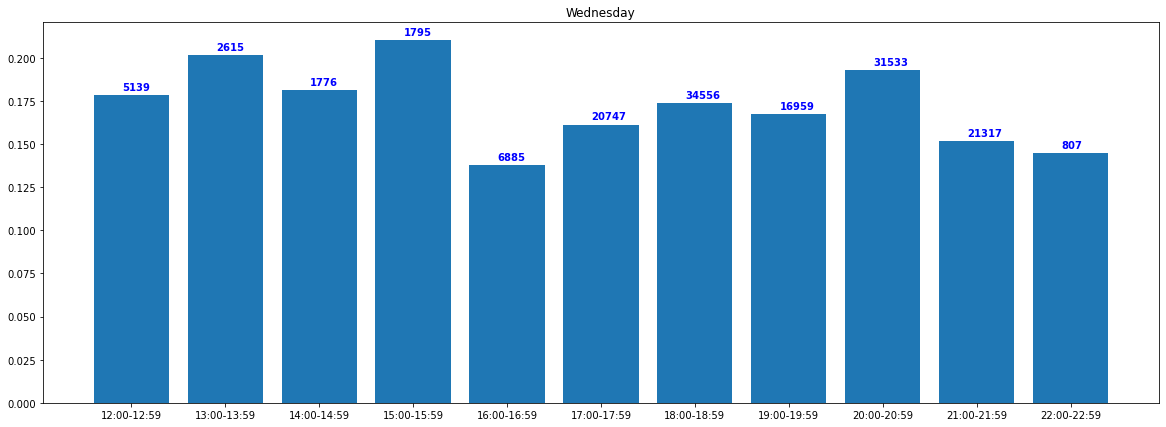

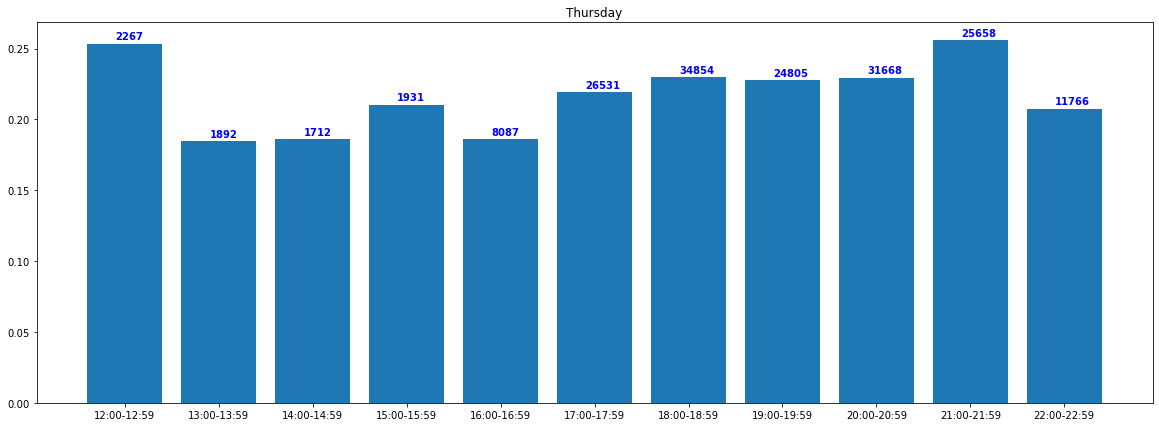

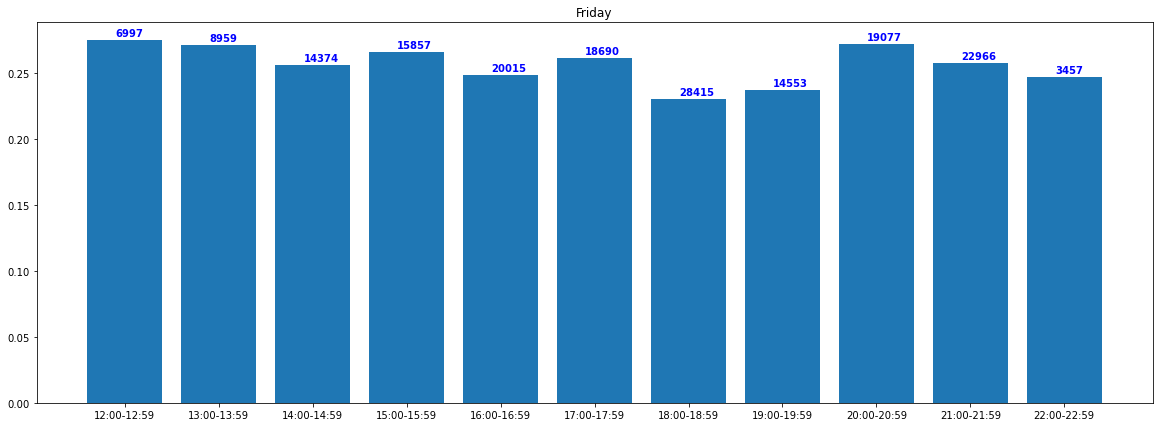

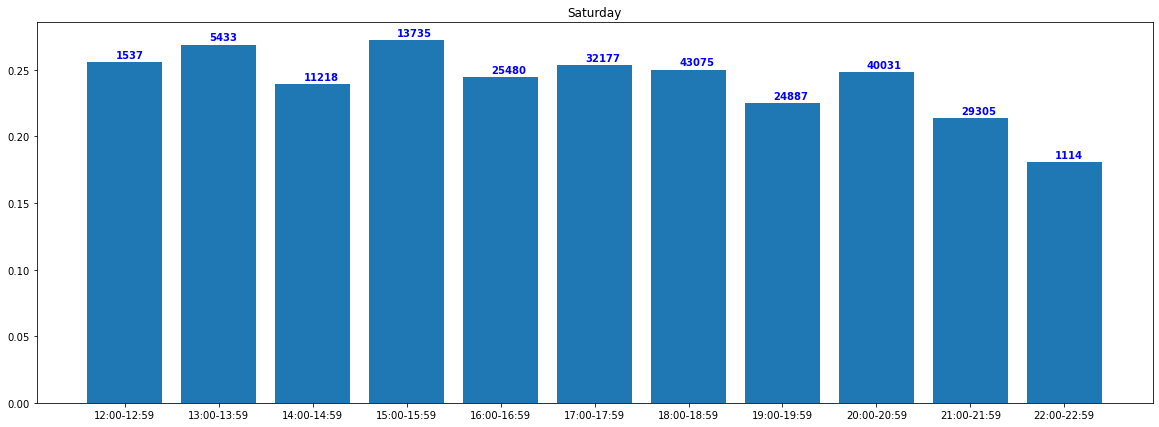

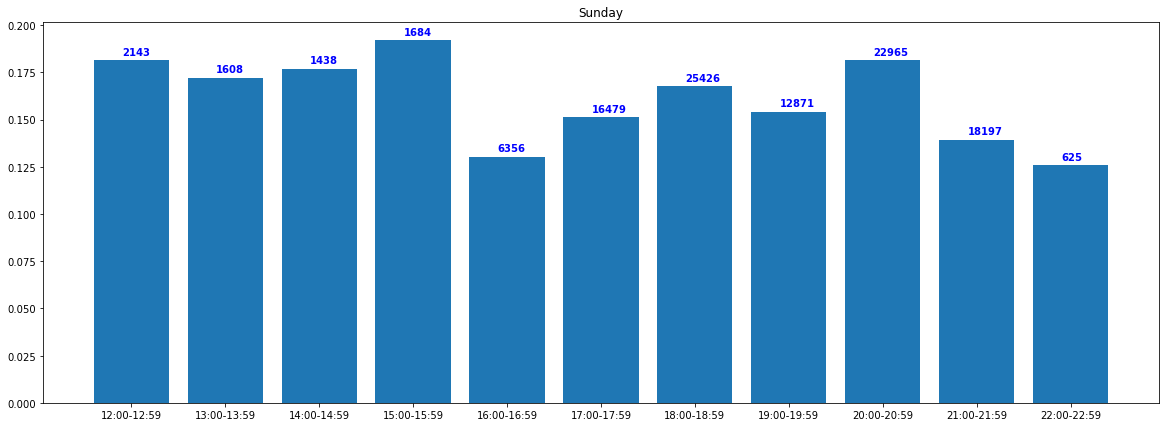

In [9]:
for day in stats_prime:
    bar_plot(stats_prime[day], title=day, r=0, d=0.1)

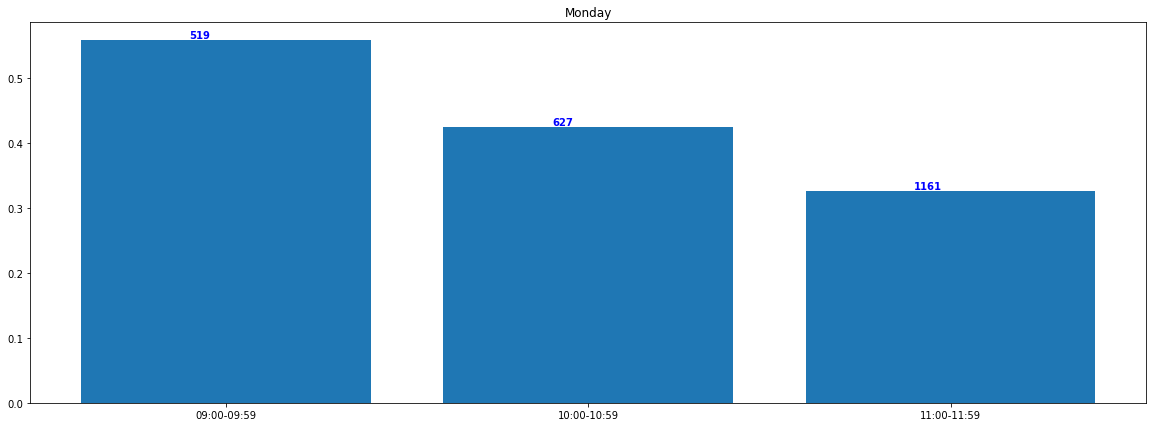

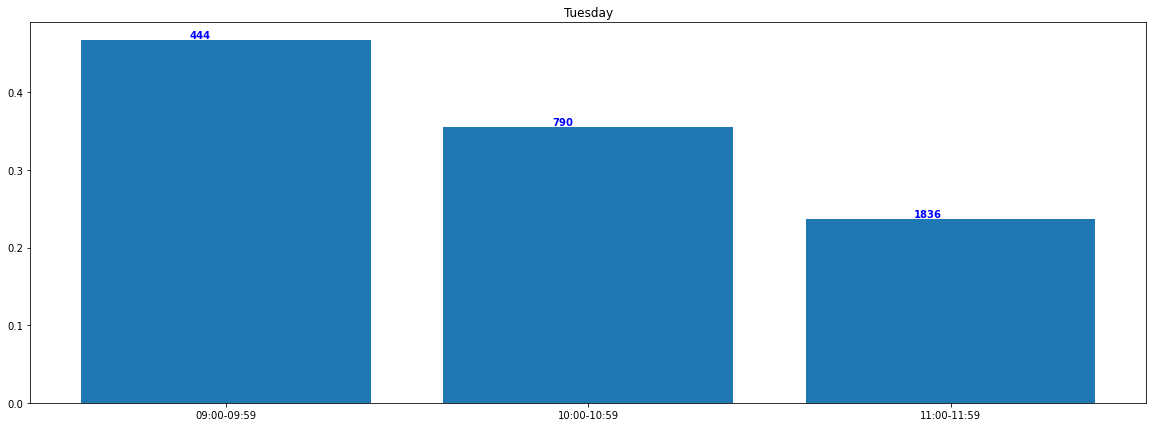

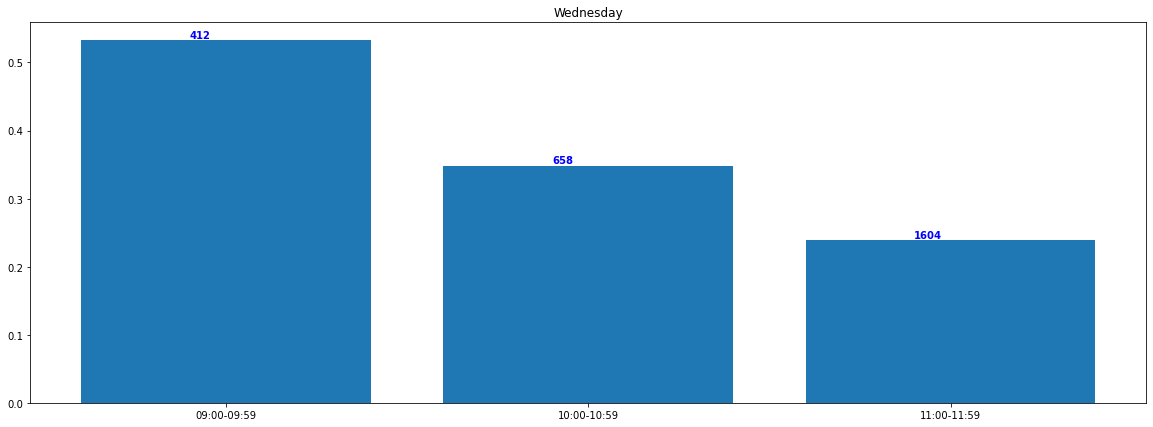

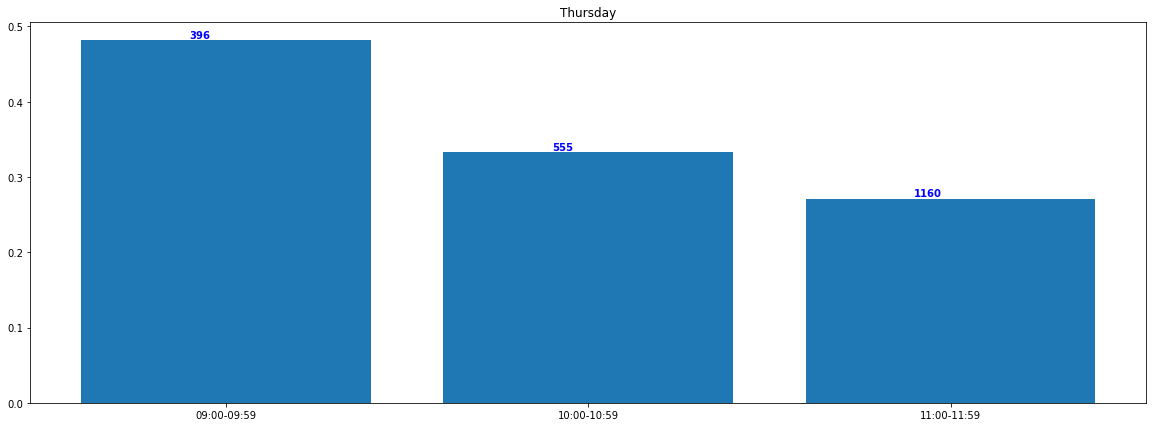

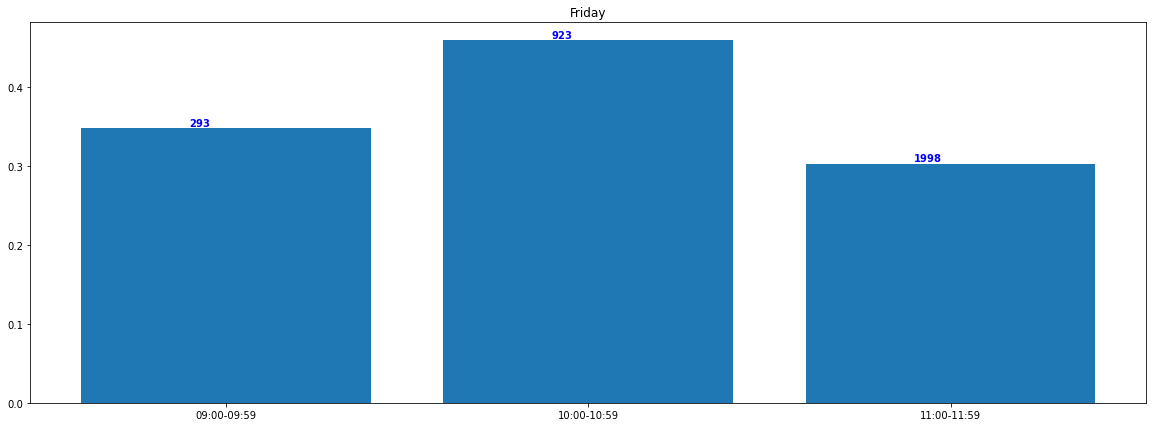

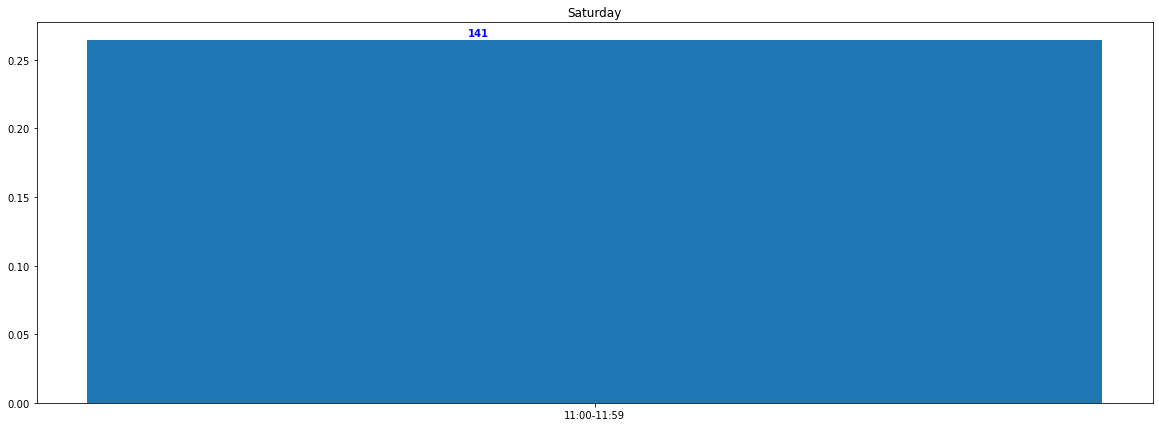

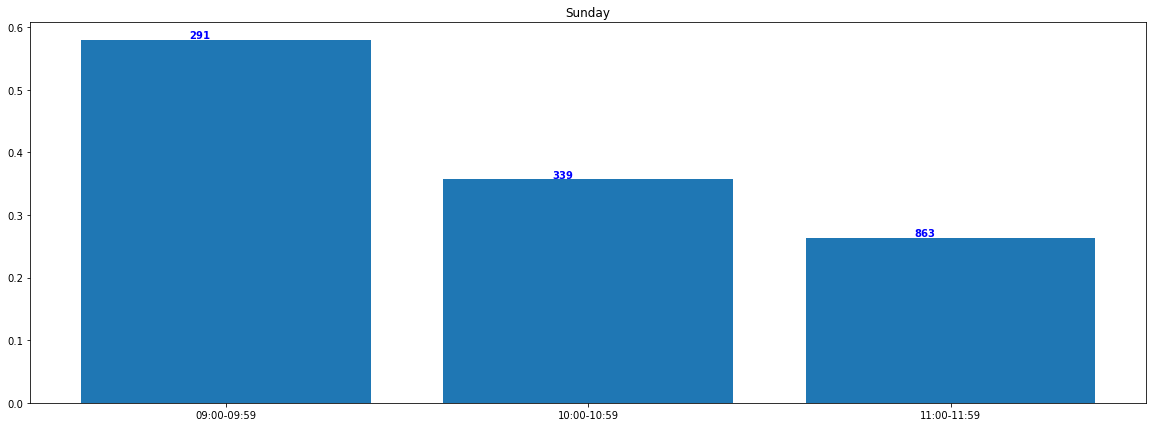

In [10]:
for day in stats_early:
    bar_plot(stats_early[day], title=day, r=0, d=0.1)